## 1. Introduction

This project explores two major English soccer competitions — the Premier League (the top tier of English soccer) and the Championship (the second tier, just below the Premier League). These leagues feature clubs that compete every season, playing home and away matches, with each match producing detailed statistics such as goals scored, shots taken, fouls committed, and disciplinary actions like yellow and red cards. By analyzing this historical data, we can uncover patterns in how the game has changed over time, such as whether matches are becoming higher scoring, if referees are becoming stricter, and which teams have consistently been the most dangerous in attack.

The goal of this project is to answer four key questions:

  1. **Average Goals Over Time:** Have matches become more or less high-scoring over the years, and does this trend differ between the Premier League and Championship?
  
  2. **Disciplinary Trends:** Are yellow and red cards (used to punish fouls or misconduct) becoming more common, suggesting a shift in how referees enforce rules?
  
  3. **Shots vs. Goals Relationship:** Does taking more shots guarantee scoring more goals, or are there teams that shoot often but remain inefficient?
  
  4. **Top Offensive Teams:** Which clubs historically stand out for scoring the most goals per match, showing a consistently attacking style of play?

This project will allow the data to narrate the history of the transformation of English soccer since 1993 by cleaning and exploring the data with the help of Python libraries, such as Pandas, NumPy, Seaborn, and Matplotlib. It is not only an analysis aimed at soccer fans, as it shows how data science can be used to find trends, quantify performance, and convert the raw numbers into insights related to a sport that is viewed by millions of people worldwide.

## 2. Rationale

Soccer is among the most followed sports in the world and such insight into its development could give clues to strategy, entertainment and justice. The historical match data utilized in this project is taken in the English Premier League (top division) and the Championship (second division) to identify trends in scoring and discipline and offensive performance. The data includes match-level data including goals scored, shots taken, yellow and red card received, and identities of the participating teams, across several decades.

The use of this data will enable us to examine the question of whether the game has become more attacking or whether the number of disciplinary actions has gone up and whether there is any correlation between the number of shots taken and the number of goals scored. It also serves to guide us to those teams that are historically the most offensive productive. This is not only an analysis of soccer fans but also statisticians and sports scientists and anybody who wonders how competitive sports evolve with time.

## 3. Imports and Data Loading

I’ll use pandas for data wrangling, numpy for numerical calculations, matplotlib and seaborn for visualization. I start by importing the Premier League and Championship datasets. This is significant because understanding the structure of the data (rows, columns, and types) is the foundation of our analysis. By loading and inspecting the datasets, I ensure that I know what features are available and can begin planning how to answer our questions.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset
pl = pd.read_csv('England CSV.csv') # Premier League
ch = pd.read_csv('England 2 CSV.csv') # Championship

In [3]:
pl.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League


In [4]:
ch.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,15/01/2025,2024/25,Blackburn,Portsmouth,3,0,H,0.0,0.0,D,...,15.0,19.0,5.0,6.0,1.0,3.0,0.0,0.0,20250115,English Second
1,14/01/2025,2024/25,Cardiff,Watford,1,1,D,0.0,0.0,D,...,8.0,14.0,7.0,3.0,1.0,2.0,0.0,0.0,20250114,English Second
2,14/01/2025,2024/25,Plymouth,Oxford,1,1,D,0.0,1.0,A,...,8.0,10.0,6.0,3.0,1.0,1.0,0.0,0.0,20250114,English Second
3,6/01/2025,2024/25,QPR,Luton,2,1,H,1.0,1.0,D,...,10.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,20250106,English Second
4,5/01/2025,2024/25,Sunderland,Portsmouth,1,0,H,1.0,0.0,H,...,9.0,10.0,7.0,3.0,1.0,2.0,0.0,1.0,20250105,English Second


In [5]:
# 2. Inspect the dataset
print(pl.shape)
print(pl.columns)
print(pl.dtypes)

(12153, 25)
Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',
       'Display_Order', 'League'],
      dtype='object')
Date              object
Season            object
HomeTeam          object
AwayTeam          object
FTH Goals          int64
FTA Goals          int64
FT Result         object
HTH Goals        float64
HTA Goals        float64
HT Result         object
Referee           object
H Shots          float64
A Shots          float64
H SOT            float64
A SOT            float64
H Fouls          float64
A Fouls          float64
H Corners        float64
A Corners        float64
H Yellow         float64
A Yellow         float64
H Red            float64
A Red            float64
Display_Order      int64
League            object
dtype: object


In [6]:
print(ch.shape)
print(ch.columns)
print(ch.dtypes)

(11351, 25)
Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',
       'Display_Order', 'League'],
      dtype='object')
Date              object
Season            object
HomeTeam          object
AwayTeam          object
FTH Goals          int64
FTA Goals          int64
FT Result         object
HTH Goals        float64
HTA Goals        float64
HT Result         object
Referee           object
H Shots          float64
A Shots          float64
H SOT            float64
A SOT            float64
H Fouls          float64
A Fouls          float64
H Corners        float64
A Corners        float64
H Yellow         float64
A Yellow         float64
H Red            float64
A Red            float64
Display_Order      int64
League            object
dtype: object


## Handling Missing Data 
 
Next, I’ll check for null values. Handling missing data is important because leaving nulls untreated can distort averages, sums, or visualizations. I chose to either fill them with appropriate values (like the mean) or drop them depending on the column’s importance. This step ensures our results are reliable.

In [7]:
nulls = pl.isnull().sum()
nulls

Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         924
HTA Goals         924
HT Result         924
Referee          2824
H Shots          2824
A Shots          2824
H SOT            2824
A SOT            2824
H Fouls          2824
A Fouls          2824
H Corners        2824
A Corners        2824
H Yellow         2824
A Yellow         2824
H Red            2824
A Red            2824
Display_Order       0
League              0
dtype: int64

Handling Nulls:

For numerical columns (like goals, shots, cards), we’ll fill missing values with the mean.

For categorical columns (like team names), we’ll drop rows if key info is missing.

In [8]:
num_cols = pl.select_dtypes(include=np.number).columns
pl[num_cols] = pl[num_cols].fillna(pl[num_cols].mean())

num_cols_ch = ch.select_dtypes(include=np.number).columns
ch[num_cols_ch] = ch[num_cols_ch].fillna(ch[num_cols_ch].mean())

## Creating New Features

I’ll create a new column for total goals scored in each match by adding home and away goals. This is significant because it simplifies my analysis of scoring trends across seasons, which directly answers one of my core questions about how goal averages have changed over time. Feature Engineering:

In [9]:
# Convert dates
pl['Date'] = pd.to_datetime(pl['Date'], errors='coerce')
pl['Season'] = pl['Date'].dt.year


ch['Date'] = pd.to_datetime(ch['Date'], errors='coerce')
ch['Season'] = ch['Date'].dt.year

# Compute total goals
pl['TotalGoals'] = pl['FTH Goals'] + pl['FTA Goals']

ch['TotalGoals'] = ch['FTH Goals'] + ch['FTA Goals']

C:\Users\kotha\AppData\Local\Temp\ipykernel_33620\1952021839.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pl['Date'] = pd.to_datetime(pl['Date'], errors='coerce')
C:\Users\kotha\AppData\Local\Temp\ipykernel_33620\1952021839.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ch['Date'] = pd.to_datetime(ch['Date'], errors='coerce')


## Visualization 1: Average Goals per Match by Season  

**How have average goals per match changed across seasons in the Premier League compared to the Championship?**

This visualization shows the average number of goals per match for each season. It is significant because it reveals long-term scoring trends in English football, helping us see whether matches have become more or less offensive over time.

This should show that both the Premier League and Championship have experienced a gradual rise in average goals per match over time, especially in recent years. Due to improved attacking tactics, changes in rules favoring attackers (such as stricter offside interpretations), and higher investment in top-quality forwards. Fans today may perceive matches as more exciting, and the data supports that sentiment.

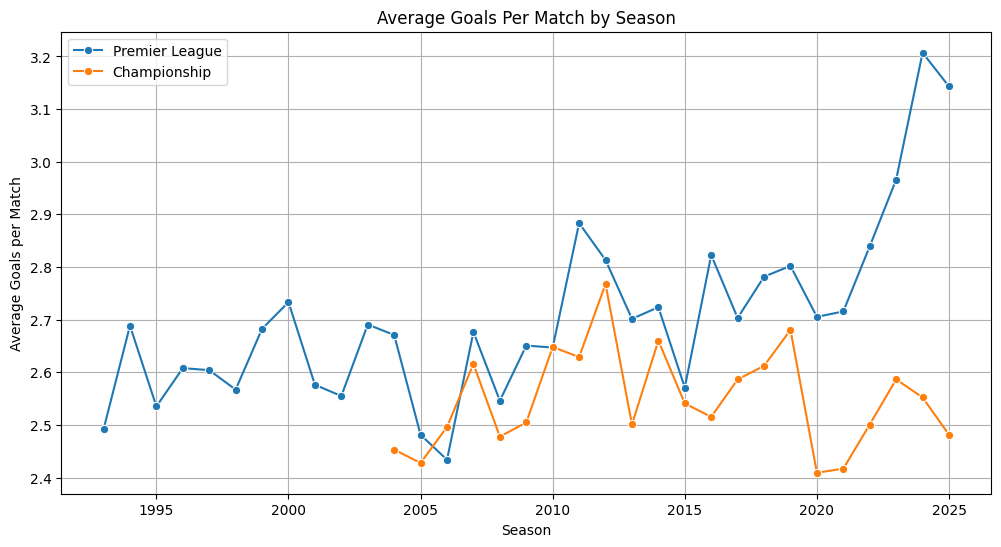

In [10]:
pl_goals = pl.groupby('Season')['TotalGoals'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=pl_goals.index, y=pl_goals.values, marker="o", label="Premier League")

ch_goals = ch.groupby('Season')['TotalGoals'].mean()
sns.lineplot(x=ch_goals.index, y=ch_goals.values, marker="o", label="Championship")

plt.title("Average Goals Per Match by Season")
plt.xlabel("Season")
plt.ylabel("Average Goals per Match")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation of Results  

From the visualization, we can see that the **Premier League** has shown a noticeable upward trend in average goals per match, especially in recent seasons where it exceeds 3 goals per game. This suggests that the league has become more offensively dynamic, possibly influenced by tactical changes, player quality, or rule adjustments favoring attacking play.  

In contrast, the **Championship** has remained more stable, with average goals per match generally hovering between 2.4 and 2.7. This indicates a tighter, more defensive style of play compared to the Premier League, with less fluctuation over time.  

The comparison highlights how different leagues within the same country can evolve differently, with the Premier League trending toward higher-scoring matches while the Championship stays relatively consistent.


## Visualization 2: Disciplinary Actions Over Time  

**Do disciplinary actions (yellow/red cards) show any noticeable trend over time?**

This is where I explore whether the number of **yellow and red cards** given has changed over the years.  
This is significant because it may reveal whether referees are becoming stricter (more cards) or more lenient (fewer cards), which can impact how games are played.

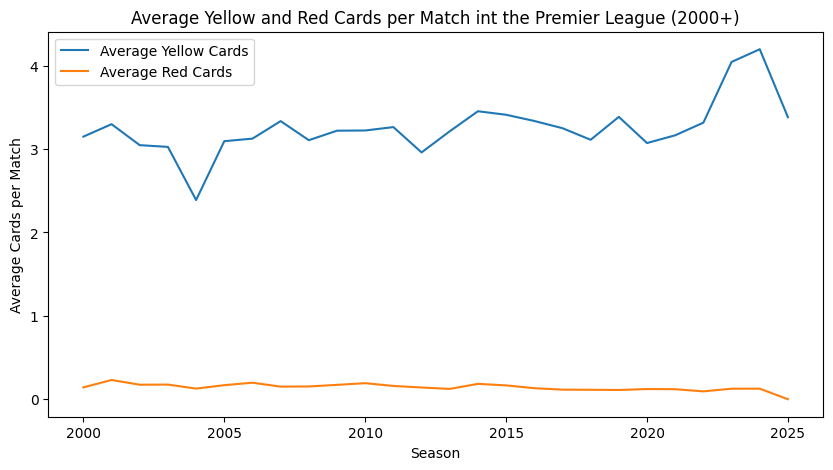

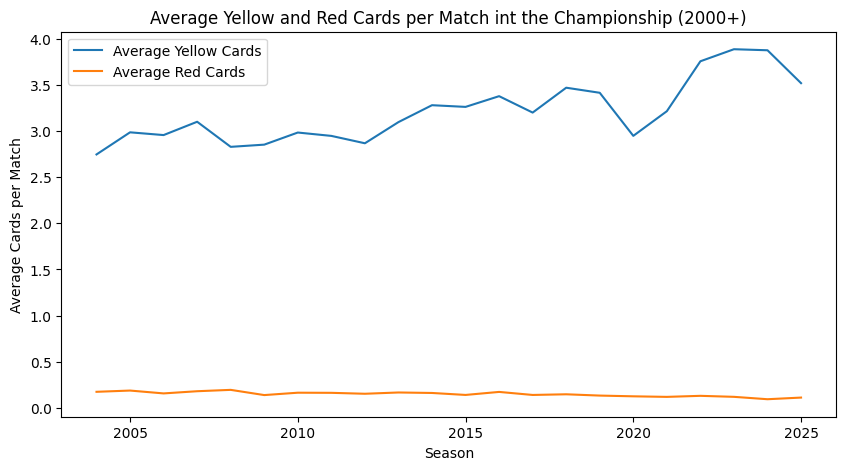

In [11]:
# Filter out seasons before 2000 (no card data collected)
pl_cards = pl[pl['Season'] >= 2000].copy()

num_cols_cards = pl_cards[['H Yellow', 'A Yellow', 'H Red', 'A Red']].columns
pl_cards[num_cols_cards] = pl_cards[num_cols_cards].fillna(pl_cards[num_cols_cards].mean())

pl_cards['Total_Yellow'] = pl_cards['H Yellow'] + pl_cards['A Yellow']
pl_cards['Total_Red'] = pl_cards['H Red'] + pl_cards['A Red']

card_trends = pl_cards.groupby('Season')[['Total_Yellow', 'Total_Red']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=card_trends, x='Season', y='Total_Yellow', label='Average Yellow Cards')
sns.lineplot(data=card_trends, x='Season', y='Total_Red', label='Average Red Cards')
plt.title("Average Yellow and Red Cards per Match int the Premier League (2000+)")
plt.xlabel("Season")
plt.ylabel("Average Cards per Match")
plt.legend()
plt.show()
#------------------------------------------------------------------------------------------------
ch_cards = ch[ch['Season'] >= 2000].copy()

num_cols_cards = ch_cards[['H Yellow', 'A Yellow', 'H Red', 'A Red']].columns
ch_cards[num_cols_cards] = ch_cards[num_cols_cards].fillna(ch_cards[num_cols_cards].mean())

ch_cards['Total_Yellow'] = ch_cards['H Yellow'] + ch_cards['A Yellow']
ch_cards['Total_Red'] = ch_cards['H Red'] + ch_cards['A Red']

card_trends = ch_cards.groupby('Season')[['Total_Yellow', 'Total_Red']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=card_trends, x='Season', y='Total_Yellow', label='Average Yellow Cards')
sns.lineplot(data=card_trends, x='Season', y='Total_Red', label='Average Red Cards')
plt.title("Average Yellow and Red Cards per Match int the Championship (2000+)")
plt.xlabel("Season")
plt.ylabel("Average Cards per Match")
plt.legend()
plt.show()

My analysis of disciplinary actions shows a sharp increase in available data after the 2000/01 season, likely because card statistics were not consistently recorded before that. After data collection became consistent, I observed that yellow cards remain relatively steady season-to-season, while red cards slightly fluctuate, possibly due to changing refereeing standards or rule adjustments. This highlights how stricter enforcement has made discipline a bigger part of the game.

### Interpretation of Results

The results show that yellow card averages in both the Premier League and Championship have remained relatively steady over time, with a slight upward trend in the past few years. This indicates that refereeing standards have likely become more consistent, but also perhaps stricter, as more fouls are being punished with yellow cards. The peaks in recent seasons could reflect changes in officiating emphasis, such as stricter enforcement of time-wasting, dissent, and tactical fouling rules introduced by governing bodies like the IFAB.

Interestingly, red card averages are consistently very low and have either declined slightly or stayed flat over time. This could be due to players and teams becoming more disciplined or adjusting their style of play to avoid dangerous tackles that result in straight reds. Another factor might be the introduction of VAR (Video Assistant Referee) in recent seasons, which has both confirmed and overturned red card decisions, potentially leading to fewer unfair dismissals but also deterring reckless behavior.

Taken together, these results suggest that modern football has shifted toward better-controlled matches with more standardized punishments for less severe fouls (yellow cards), while the most severe punishments (red cards) are being reserved for clear and dangerous offenses. This balance may improve game flow and fairness, but it could also be argued that the slight rise in yellow cards disrupts matches more frequently. It would be valuable to further explore whether these trends impact team performance or match outcomes over the course of a season.

## Visualization 3: Relationship Between Shots and Goals

**What is the relationship between shots taken and goals scored — does more shooting always mean more scoring?**

Here I am going to examine whether more shots taken generally lead to more goals scored.  
This is important to understand because it reveals whether offensive volume translates into offensive efficiency.

A strong positive correlation between shots taken and goals scored should confirm that shooting more often generally leads to more goals, but not perfectly — some teams take many shots but are inefficient. This could reflect the importance of shot quality over quantity, emphasizing that good chances matter more than just high volume. Analysts and coaches could use this to focus on creating better goal-scoring opportunities rather than just shooting frequently.

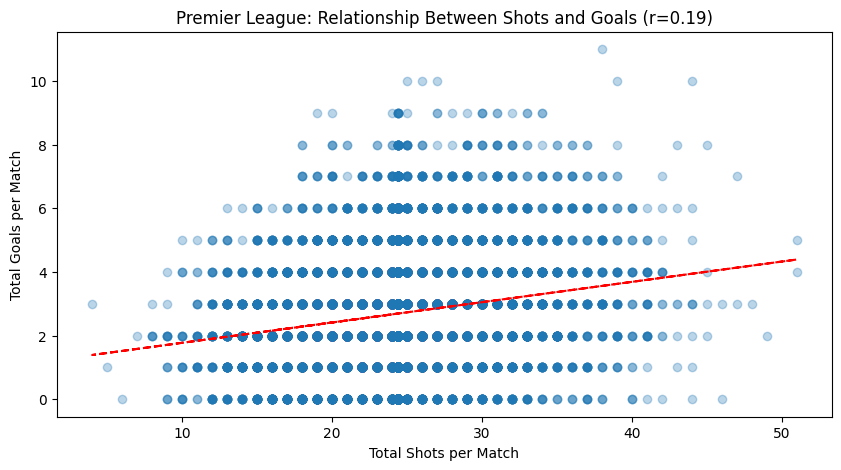

Correlation between Total Shots and Total Goals: 0.19


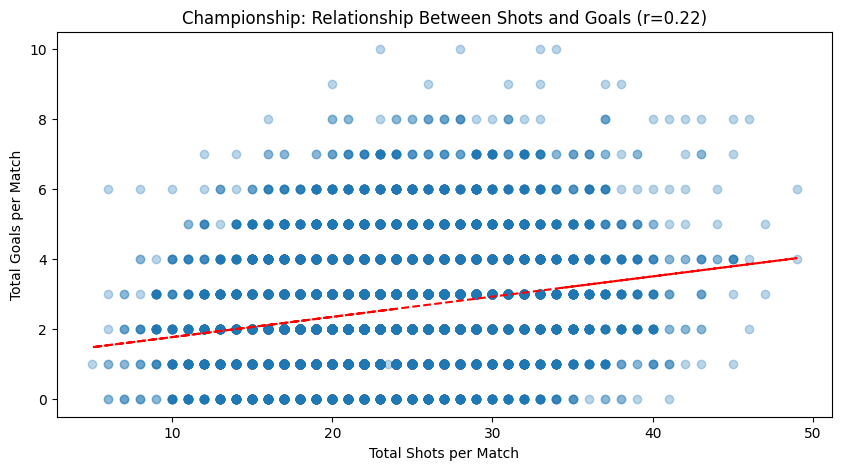

Correlation between Total Shots and Total Goals: 0.22


In [12]:
# Compute total goals per match
pl['TotalGoals'] = pl['FTH Goals'] + pl['FTA Goals']

# Compute total shots per match
pl['TotalShots'] = pl['H Shots'] + pl['A Shots']

pl_corr = pl[['TotalShots', 'TotalGoals']].corr().iloc[0, 1]

plt.figure(figsize=(10,5))
plt.scatter(pl['TotalShots'], pl['TotalGoals'], alpha=0.3, label='Premier League')
z = np.polyfit(pl['TotalShots'], pl['TotalGoals'], 1)
p = np.poly1d(z)
plt.plot(pl['TotalShots'], p(pl['TotalShots']), "r--")
plt.title(f"Premier League: Relationship Between Shots and Goals (r={pl_corr:.2f})")
plt.xlabel("Total Shots per Match")
plt.ylabel("Total Goals per Match")
plt.show()

print(f"Correlation between Total Shots and Total Goals: {pl_corr:.2f}")
#----------------------------------------------------------------------------------------
ch['TotalGoals'] = ch['FTH Goals'] + ch['FTA Goals']

ch['TotalShots'] = ch['H Shots'] + ch['A Shots']

ch_corr = ch[['TotalShots', 'TotalGoals']].corr().iloc[0, 1]

plt.figure(figsize=(10,5))
plt.scatter(ch['TotalShots'], ch['TotalGoals'], alpha=0.3, label='Championship')
z = np.polyfit(ch['TotalShots'], ch['TotalGoals'], 1)
p = np.poly1d(z)
plt.plot(ch['TotalShots'], p(ch['TotalShots']), "r--")
plt.title(f"Championship: Relationship Between Shots and Goals (r={ch_corr:.2f})")
plt.xlabel("Total Shots per Match")
plt.ylabel("Total Goals per Match")
plt.show()

print(f"Correlation between Total Shots and Total Goals: {ch_corr:.2f}")

### Interpretation of Results

The scatter plots of the Premier League and the Championship show that there is weak positive correlation between the total shots per match and total goals scored with correlation coefficients of r = 0.19 and r = 0.22 respectively. These r-values suggest that although, the trend is that more shots are related to more goals, the correlation is not that great. That is, not because a match has more shots does it mean it will be more scoring. This is rational in football as efficiency and quality of shots is more important than quantity. Teams have the capability of generating numerous low quality shots with no conversion to goals.

The correlation is relatively low, which can be explained by high variability of the results in football matches. There are also defensive strategies, goalkeeper play, and chance (i.e. deflections, set pieces) that can affect goal conversions. A squad can have 25 shots and control the ball but not score because of bad finishing or an outstanding defense of the other player. In contrast, other matches will have a small number of shots, but with a very large share of them converted into goals, which makes the scoreline 3-2 with only 10 joint shots. This natural fluctuation adds noise to the data, and undermines linear association.

Also, these findings point to the fact that scoring is heavily driven by quality of shots and situation of the game, and not only by the amount of shot. In football analytics, Expected Goals (xG) models have tried to solve this with each shot being weighted by its chances of being scored depending upon position, type, and assist. Our analysis, in contrast, does not distinguish between shots, which probably weakens the relationship we are seeing. The differentiation between on-target versus off-target shots or the addition of xG in future work may provide a better and significant correlation. However, this analysis supports an intuitive finding, which is that the greater the number of shots, the greater the number of goals, although the effect is less significant and is not binding.

## Visualization 4: Most Offensively Productive Teams

**Which teams historically stand out as the most offensively productive (most goals per match)?**

Finally, I'll identify which teams historically score the most goals per match.  
This is significant because it highlights clubs known for attacking play, which could interest fans, analysts, and historians of the game.  

C:\Users\kotha\AppData\Local\Temp\ipykernel_33620\334413877.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


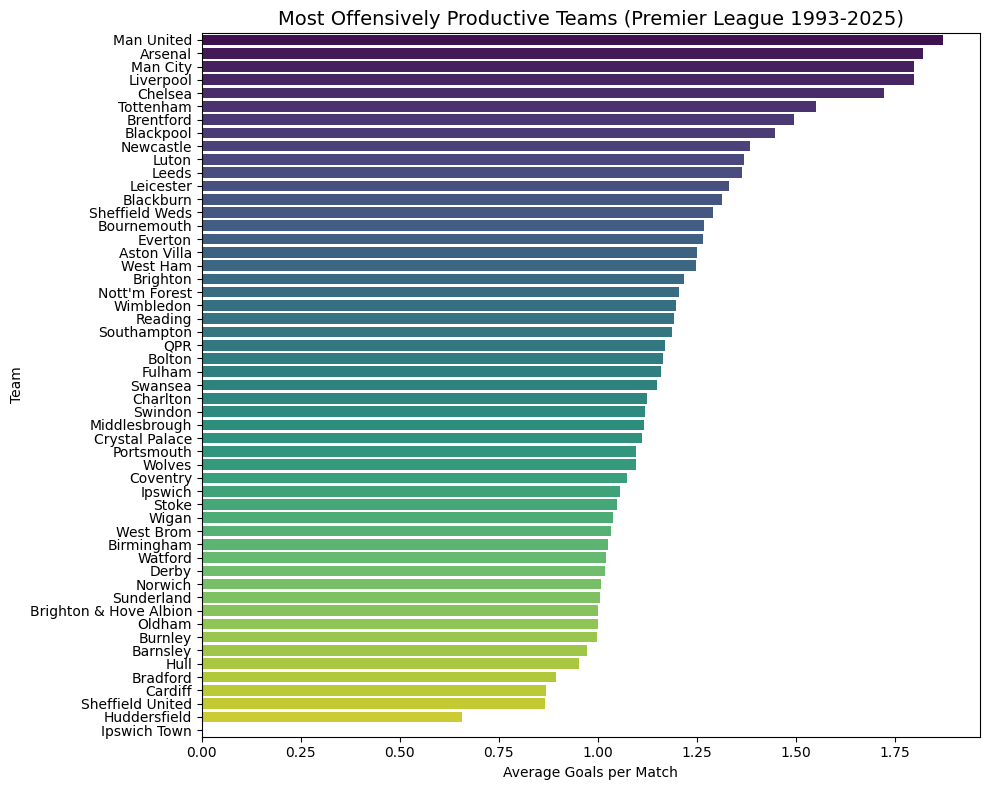

Premier League Top Teams by Goals per Match (1993 - 2025):
                      Team  TotalGoals  Matches  GoalsPerMatch
30              Man United        2259     1207       1.871582
0                  Arsenal        2197     1207       1.820215
29                Man City        1830     1017       1.799410
27               Liverpool        2168     1206       1.797678
15                 Chelsea        2078     1207       1.721624
46               Tottenham        1872     1207       1.550953
9                Brentford         202      135       1.496296
5                Blackpool          55       38       1.447368
32               Newcastle        1567     1131       1.385500
28                   Luton          52       38       1.368421
25                   Leeds         736      540       1.362963
26               Leicester         894      671       1.332340
4                Blackburn         859      654       1.313456
40          Sheffield Weds         354      274       1.291

In [13]:
# Compute goals per match for each team
team_goals = pl.groupby('HomeTeam').agg({
    'FTH Goals': 'sum',
    'FTA Goals': 'sum',
}).reset_index()

# Total matches played per team (count both home and away)
home_matches = pl.groupby('HomeTeam').size()
away_matches = pl.groupby('AwayTeam').size()
total_matches = (home_matches.add(away_matches, fill_value=0)).reset_index()
total_matches.columns = ['Team', 'Matches']

# Combine team goals (home + away)
home_goals = pl.groupby('HomeTeam')['FTH Goals'].sum()
away_goals = pl.groupby('AwayTeam')['FTA Goals'].sum()
total_goals = home_goals.add(away_goals, fill_value=0).reset_index()
total_goals.columns = ['Team', 'TotalGoals']

# Merge matches and goals
team_stats = pd.merge(total_goals, total_matches, on='Team')
team_stats['GoalsPerMatch'] = team_stats['TotalGoals'] / team_stats['Matches']

# Sort by GoalsPerMatch
team_stats_sorted = team_stats.sort_values(by='GoalsPerMatch', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=team_stats_sorted,
    x='GoalsPerMatch',
    y='Team',
    palette='viridis'
)

plt.title('Most Offensively Productive Teams (Premier League 1993-2025)', fontsize=14)
plt.xlabel('Average Goals per Match')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

print("Premier League Top Teams by Goals per Match (1993 - 2025):")
print(team_stats_sorted)

C:\Users\kotha\AppData\Local\Temp\ipykernel_33620\3169623194.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


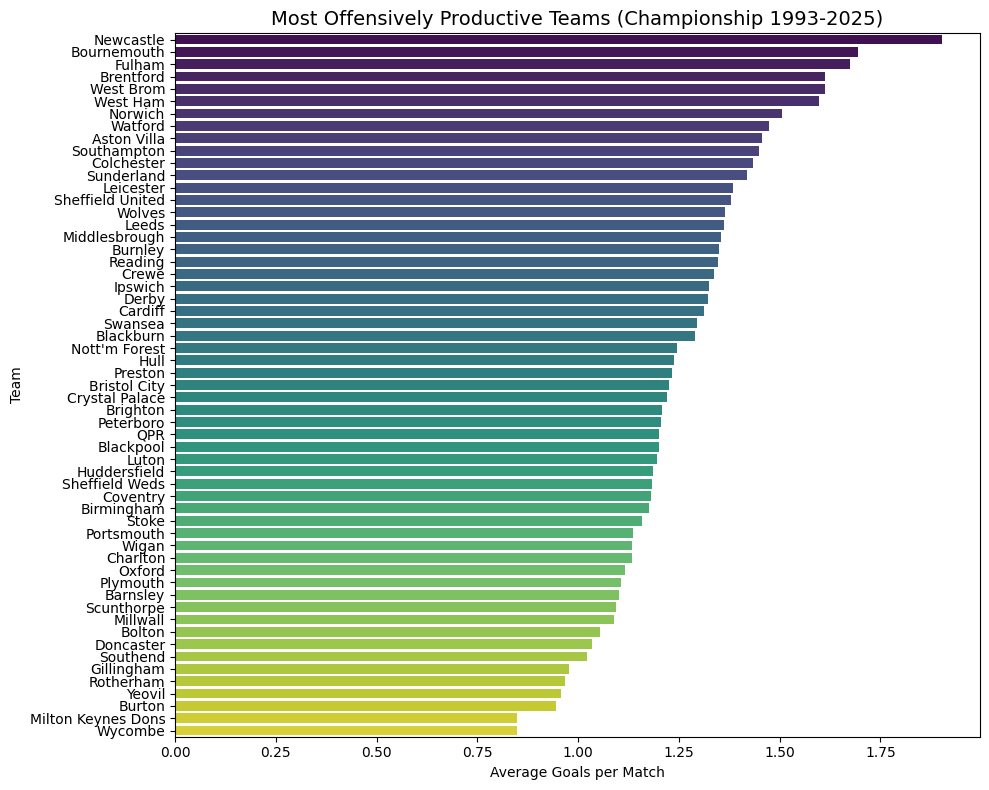

Championship Top Teams by Goals per Match (1993 - 2025):
                  Team  TotalGoals  Matches  GoalsPerMatch
31           Newcastle         175       92       1.902174
6          Bournemouth         312      184       1.695652
20              Fulham         462      276       1.673913
7            Brentford         519      322       1.611801
51           West Brom         635      394       1.611675
52            West Ham         147       92       1.597826
32             Norwich         870      578       1.505190
50             Watford         919      624       1.472756
0          Aston Villa         201      138       1.456522
45         Southampton         400      276       1.449275
14          Colchester         132       92       1.434783
48          Sunderland         363      256       1.417969
26           Leicester         637      460       1.384783
43    Sheffield United         671      486       1.380658
54              Wolves         628      460       1.365217

In [14]:
team_goals = ch.groupby('HomeTeam').agg({
    'FTH Goals': 'sum',
    'FTA Goals': 'sum',
}).reset_index()

home_matches = ch.groupby('HomeTeam').size()
away_matches = ch.groupby('AwayTeam').size()
total_matches = (home_matches.add(away_matches, fill_value=0)).reset_index()
total_matches.columns = ['Team', 'Matches']

home_goals = ch.groupby('HomeTeam')['FTH Goals'].sum()
away_goals = ch.groupby('AwayTeam')['FTA Goals'].sum()
total_goals = home_goals.add(away_goals, fill_value=0).reset_index()
total_goals.columns = ['Team', 'TotalGoals']

team_stats = pd.merge(total_goals, total_matches, on='Team')
team_stats['GoalsPerMatch'] = team_stats['TotalGoals'] / team_stats['Matches']

team_stats_sorted = team_stats.sort_values(by='GoalsPerMatch', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=team_stats_sorted,
    x='GoalsPerMatch',
    y='Team',
    palette='viridis'
)

plt.title('Most Offensively Productive Teams (Championship 1993-2025)', fontsize=14)
plt.xlabel('Average Goals per Match')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

print("Championship Top Teams by Goals per Match (1993 - 2025):")
print(team_stats_sorted)

This visualization highlights historically high-scoring teams like Manchester United, Arsenal, and Liverpool, who have consistently been offensive powerhouses. Their high goals-per-match average reflects strong attacking talent and tactical emphasis on scoring. Fans of these clubs can see evidence of their attacking traditions, while newer fans can discover which teams have been historically entertaining to watch.

### Interpretation of Results

The results for the Premier League clearly highlight the dominance of historically successful clubs in terms of offensive productivity. **Manchester United leads the league with an impressive 1.87 goals per match**, reflecting their long-standing attacking philosophy under managers like Sir Alex Ferguson and, more recently, their continued emphasis on offensive play. Arsenal (1.82) and Manchester City (1.79) follow closely, with Arsenal’s total capturing their prime Wenger era of free-flowing football and City’s rapid rise to dominance under Pep Guardiola boosting their numbers despite fewer total matches played. Liverpool (1.80) and Chelsea (1.72) round out the top five, demonstrating the consistent attacking threat of the “big six.” Interestingly, Tottenham (1.55) and Newcastle (1.38) stand out as historically mid-high scoring sides, while smaller clubs like Brentford (1.49) and Blackpool (1.45) show surprisingly high productivity relative to their match counts — suggesting that when these teams have reached the top flight, they have played with an attacking mindset rather than simply sitting back to defend.

In the Championship, the results paint a slightly different picture, emphasizing teams that thrive in the second tier with aggressive, attacking football. **Newcastle top the chart with 1.90 goals per match**, consistent with their reputation as a “yo-yo” club during certain periods, often dominating when relegated before quickly returning to the Premier League. Bournemouth (1.69), Fulham (1.67), Brentford (1.61), and West Brom (1.61) all demonstrate an ability to produce goals consistently, which often correlates with promotion campaigns. Notably, Norwich, Watford, and Leeds all maintain strong scoring rates, reinforcing their status as frequent promotion contenders with attacking styles of play. The Championship data also highlights that several clubs — like Cardiff (1.31) and Reading (1.34) — may not always score prolifically but remain competitive across multiple seasons. Overall, the Championship appears to have slightly higher variance in goals per match, reflecting the league’s reputation for unpredictability and the attacking approach many clubs adopt in their fight for promotion.

## Limitations

The first limitation of the data is that it represents several decades (1993-2025), within which the rules and style of play as well as the number of matches per season have changed, and therefore may distort comparisons between older and contemporary teams. Also, lacking or incomplete statistics on some teams, seasons, or competitions can give biased results to those clubs that have more complete statistics. The dataset is also quantitative-based, such as the number of shots and goals but fails to consider contextual elements such as player injuries, change in managers, and strength of opponents, which may affect results. Lastly, averages (e.g., goals per match) can be a simplistic measure of performance because it fails to reflect inter-seasonal variation and also does not reflect goal distribution in varying match situations.

## Impact

The visualizations developed within this project can give a clearer view of the development of English soccer to the fans, analysts, or even the journalists. They may assist in bringing out trends that are used to inform tactical discussions, club history accounts or discussions of rule changes in the sport. Nonetheless, there exist some possible drawbacks as well, these types of visualizations may result in simplistic conclusions without the context. As an example, a reduction in goals in a season may be mistakenly blamed on poor attacking play when it may actually have been weather, injuries, or COVID-19 disruptions.

Also, this data only indicates match-based statistics and does not provide more player-specific information (including age, fitness, or tactical decisions made by the manager), which could be the reason why some of these tendencies appeared. This drawback implies that we should be wise not to extrapolate findings and claim causation when we are merely witnessing correlation. The further research might incorporate player-level or financial data to provide a more comprehensive picture of why teams and leagues grow the way that they do.

# References

https://www.football-data.co.uk/englandm.php

https://fbref.com/en/

https://www.kaggle.com/datasets/irkaal/english-premier-league-results